# CM50266 - Applied Data Science
## Case Study 2: Electric Vehicle Support Infrastructure

First, import the relevant libraries as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA


import warnings

warnings.filterwarnings("ignore")

## Task 1: Basic Analysis 

### Dataset

The dataset used is the AADF Data - major and minor roads dataset provided by the UK Department for Transport. It can be found at https://roadtraffic.dft.gov.uk/downloads or directly downloaded from https://storage.googleapis.com/dft-statistics/road-traffic/downloads/data-gov-uk/dft_traffic_counts_aadf.zip. In this case, I have renamed the csv file to 'traffic'.

In [2]:
df_traffic = pd.read_csv ('traffic.csv')

df_cleaning = df_traffic.copy()

In [3]:
df_cleaning

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,35,1787,192,99,72,25,391,216,996,12959
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,149,9592,1167,192,269,403,3799,1788,7619,55977
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,276,5603,1052,140,230,106,508,1186,3222,47203
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,186,7242,629,152,152,37,120,196,1285,55089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,683,2765,127,15,6,3,1,4,156,15628
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,21,3158,346,81,180,36,177,127,948,18804
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,81,643,67,20,30,1,14,9,141,6534
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,79,1309,229,48,54,107,148,107,692,9701


In [4]:
df_cleaning.columns

Index(['id', 'count_point_id', 'year', 'region_id', 'local_authority_id',
       'road_name', 'road_category', 'road_type', 'start_junction_road_name',
       'end_junction_road_name', 'easting', 'northing', 'latitude',
       'longitude', 'link_length_km', 'link_length_miles', 'sequence', 'ramp',
       'estimation_method', 'estimation_method_detailed', 'pedal_cycles',
       'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches',
       'lgvs', 'hgvs_2_rigid_axle', 'hgvs_3_rigid_axle',
       'hgvs_4_or_more_rigid_axle', 'hgvs_3_or_4_articulated_axle',
       'hgvs_5_articulated_axle', 'hgvs_6_articulated_axle', 'all_hgvs',
       'all_motor_vehicles'],
      dtype='object')

Observing the outputs above, it is clear that the data encodes region according to an id rather than a name. This is problematic in our case as further analysis requires the regions according to their names. In order to account for this, I decided to access other datasets provided by the same website, but according to each region (available at https://roadtraffic.dft.gov.uk/regions). For example, for London (available at https://roadtraffic.dft.gov.uk/regions/6), we can download the corresponding AADF data from https://storage.googleapis.com/dft-statistics/road-traffic/downloads/aadf/region_id/dft_aadf_region_id_6.csv and observe the dataframe as seen below:

In [5]:
df_london = pd.read_csv ('dft_aadf_region_id_6.csv')

df_london

,count_point_id,year,region_id,region_name,local_authority_id,local_authority_name,road_name,road_type,start_junction_road_name,end_junction_road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,811909,2019,6,London,176,Bromley,B265,Minor,NaN,NaN,...,48,1633,121,5,18,2,1,0,146,11221
1,28861,2019,6,London,176,Bromley,A21,Major,A2212,LA Boundary,...,323,2144,122,26,16,21,18,17,221,16868
2,6779,2019,6,London,106,Bexley,A221,Major,A222,A210,...,98,2763,145,34,10,3,1,0,194,18821
3,6777,2019,6,London,146,Hammersmith and Fulham,A219,Major,A304,A308,...,1312,4847,392,93,50,23,12,19,588,27604
4,46435,2019,6,London,110,Kensington and Chelsea,A402,Major,A3220 Holland Road roundabout,A4206,...,1306,3547,271,59,65,34,5,8,441,25223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46113,46788,2019,6,London,104,Lewisham,A205,Major,Stanstead Rd,A21,...,2002,7174,618,138,219,100,98,84,1257,43196
46114,16623,2019,6,London,124,Redbridge,A110,Major,Also Whitehall Road coveres this A Junction,LA Boundary,...,233,1228,135,15,8,3,6,3,169,12797
46115,17174,2019,6,London,165,Haringey,A504,Major,B155,A10,...,499,1373,366,35,51,5,9,5,471,9739
46116,6252,2019,6,London,104,Lewisham,A21,Major,A2218,A205,...,760,2797,424,32,19,19,26,34,553,28989


Now, it is clear that a region_id of 6 corresponds to London. Rather than loading each and every file into jupyter, I just inspected them using excel and made note of which id corresponded to each region; alternatively, it might have be easier to inspect the URL of each region page as they were encrypted using the region_id (https://roadtraffic.dft.gov.uk/regions/6 is the URL for london and ends in 6 which is the corresponding id). Now, we encode the region_name variable into the original dataset as follows:

In [6]:
df_cleaning.region_id.unique()

array([ 5,  3,  9,  4,  8,  7, 10,  2,  1, 11,  6])

In [7]:
def map_id(region_id):
    if region_id == 1:
        return "South West"
    elif region_id == 2:
        return "East Midlands"
    elif region_id == 3:
        return "Scotland"
    elif region_id == 4:
        return "Wales"
    elif region_id == 5:
        return "North West"
    elif region_id == 6:
        return "London"
    elif region_id == 7:
        return "East of England"
    elif region_id == 8:
        return "Yorkshire and The Humber"
    elif region_id == 9:
        return "South East"
    elif region_id == 10:
        return "West Midlands"
    elif region_id == 11:
        return "North East"
    else:
        return ""

df_cleaning["region_name"] = df_cleaning["region_id"].apply(lambda region_id: map_id(region_id))

In [8]:
df_cleaning[['region_name','link_length_miles']]

,region_name,link_length_miles
0,North West,1.74
1,Scotland,0.68
2,South East,1.30
3,Wales,1.74
4,North West,0.31
...,...,...
489154,London,1.37
489155,East of England,1.18
489156,North West,1.18
489157,North West,1.99


### Missing Values

Notably, the dataset contains a substantial amount of missing data points (112767 points) due to the inability to accurately measure the link length of minor roads. We can visualise this from the output below:

In [9]:
df_cleaning.isnull().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name        113133
end_junction_road_name          113124
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                  112767
link_length_miles               112767
sequence                        112767
ramp                            362461
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

In [10]:
df_cleaning['road_type'][df_cleaning['link_length_miles'].isnull()].unique() 
# data only missing for minor road lengths

array(['Minor'], dtype=object)

In [11]:
df_minor = df_cleaning[df_cleaning.eq('Minor').any(1)]
df_minor.road_category.unique()

array(['MB', 'MCU'], dtype=object)

To deal with this issue, I decided to remove the minor data points completely. Other datasets are available from the same website, but they only contain total minor road length for each region. Imputing the 112767 missing data points (approximately accounting for 3/10 of the total data points) with the corresponding average link length for each region would introduce severe bias in terms of subsequent analysis. With this in mind, I filtered the dataset according to only major data points as follows:

In [12]:
df_major = df_cleaning[df_cleaning.road_type == "Major"]
df_major

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,2768,158,54,24,7,2,8,253,25927,North West
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,1787,192,99,72,25,391,216,996,12959,Scotland
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,9592,1167,192,269,403,3799,1788,7619,55977,South East
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,5603,1052,140,230,106,508,1186,3222,47203,Wales
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,7242,629,152,152,37,120,196,1285,55089,North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,2765,127,15,6,3,1,4,156,15628,London
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,3158,346,81,180,36,177,127,948,18804,East of England
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,643,67,20,30,1,14,9,141,6534,North West
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,1309,229,48,54,107,148,107,692,9701,North West


In [13]:
df_major.isnull().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name           366
end_junction_road_name             357
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                       0
link_length_miles                    0
sequence                             0
ramp                            249694
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

Now, from the output above, we can see that there are no longer any missing values for the link length variables. The major filtered dataset contains 376392 rows; recall that there were 112767 missing values and so the total of 376392 + 112767 = 489159, this of which corresponds to the number of rows in the full dataset. Hence, the minor road values accounted for all the missing link length data points.

### Data Summary



In [14]:
# grouping df by year and region
df_grouped_major = df_major.groupby(['year', 'region_name']).apply(lambda x: x) 

type_list = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs',
             'all_hgvs', 'all_motor_vehicles']

# getting mileage for each vehicle
for types in type_list:
    df_grouped_major[types + '_miles'] = (df_grouped_major[types] * df_grouped_major.link_length_miles)
    
df_grouped_major= df_grouped_major.groupby(['year', 'region_name']).sum()

type_miles_list = ['pedal_cycles_miles', 'two_wheeled_motor_vehicles_miles', 'cars_and_taxis_miles',
                   'buses_and_coaches_miles', 'lgvs_miles', 'all_hgvs_miles', 'all_motor_vehicles_miles']

# formatting df for the relevant columns
df_mileage = df_grouped_major[[*type_miles_list]]

df_mileage

pedal_cycles_miles  \
year region_name                                    
2000 East Midlands                       85100.90   
     East of England                    122218.19   
     London                             278342.85   
     North East                          32722.51   
     North West                         144374.73   
...                                           ...   
2020 South East                         288382.43   
     South West                         169430.01   
     Wales                               73884.13   
     West Midlands                       97770.52   
     Yorkshire and The Humber           154609.36   

                               two_wheeled_motor_vehicles_miles  \
year region_name                                                  
2000 East Midlands                                    284139.97   
     East of England                                  480843.82   
     London                                           793610.29   
     North East                                       107690.01   
     North West                                       365883.08   
...                                                         ...   
2020 South East                                       489005.15   
     South West                                       303330.32   
     Wales                                            136519.80   
     West Midlands                                    168992.00   
     Yorkshire and The Humber                         174860.90   

                               cars_and_taxis_miles  buses_and_coaches_miles  \
year region_name                                                               
2000 East Midlands                      32555758.29                257195.87   
     East of England                    42660097.25                365550.00   
     London                             28242608.89                579381.39   
     North East                         14141446.81                179914.64   
     North West                         46896851.48                556276.20   
...                                             ...                      ...   
2020 South East                         57270707.43                229358.05   
     South West                         32635483.11                167555.35   
     Wales                              18161800.16                106050.58   
     West Midlands                      31108255.24                132249.96   
     Yorkshire and The Humber           27758554.04                148571.57   

                                lgvs_miles  all_hgvs_miles  \
year region_name                                             
2000 East Midlands              4607688.26      4731077.79   
     East of England            6118716.56      4947361.53   
     London                     3894286.36      1589739.80   
     North East                 1803963.75      1201713.95   
     North West                 6023568.23      5171818.29   
...                                    ...             ...   
2020 South East                14012204.28      5780817.79   
     South West                 7677403.29      3146082.46   
     Wales                      4305968.82      1478953.82   
     West Midlands              7115855.44      4825406.78   
     Yorkshire and The Humber   6769688.57      4534151.00   

                               all_motor_vehicles_miles  
year region_name                                         
2000 East Midlands                          42435860.18  
     East of England                        54572569.16  
     London                                 35099333.78  
     North East                             17434729.16  
     North West                             59014397.28  
...                                                 ...  
2020 South East                             77782133.11  
     South West                             43929840.28  
     Wales                               

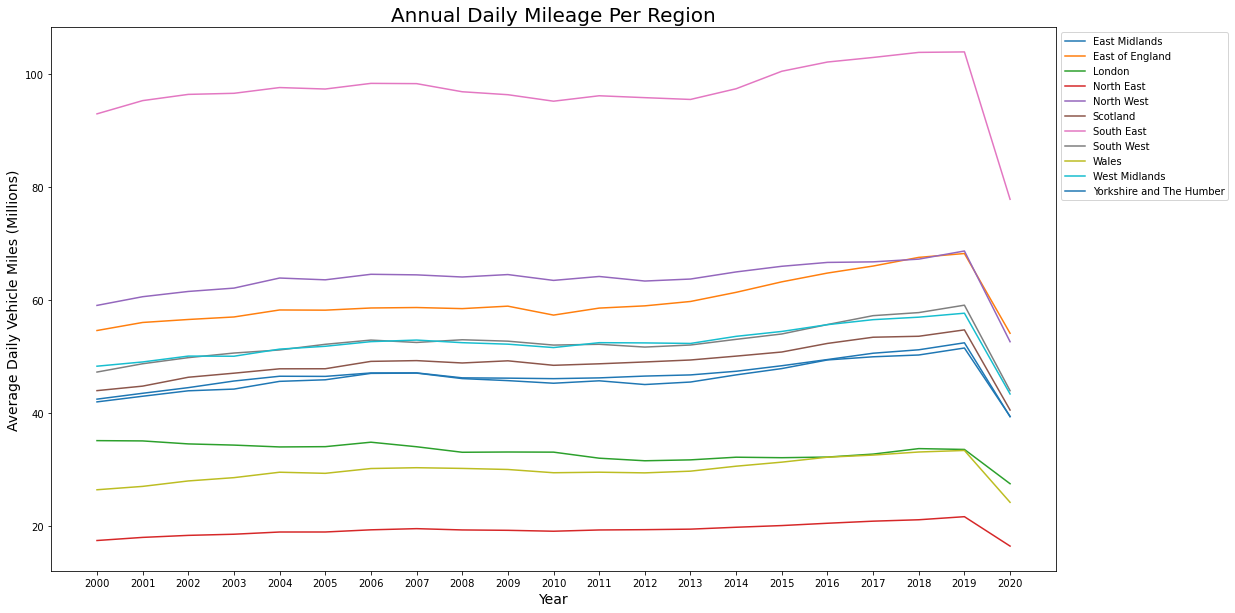

In [15]:
#extracting df for average daily mileage per region

df_plot_reg = df_mileage.copy()
df_plot_reg[df_plot_reg.columns.tolist()] = df_plot_reg[df_plot_reg.columns.tolist()] / 1000000 # converting to 
                                                                                                    #millions
df_plot_reg = df_plot_reg.unstack(level=1)
df_plot_reg.plot(y='all_motor_vehicles_miles', figsize=(18,10))

#plotting

plt.gca().set_title('Annual Daily Mileage Per Region', fontsize=20)
plt.gca().set_xticks(df_plot_reg.index)
plt.gca().set_xlabel("Year", fontsize=14)
plt.gca().set_ylabel("Average Daily Vehicle Miles (Millions)", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

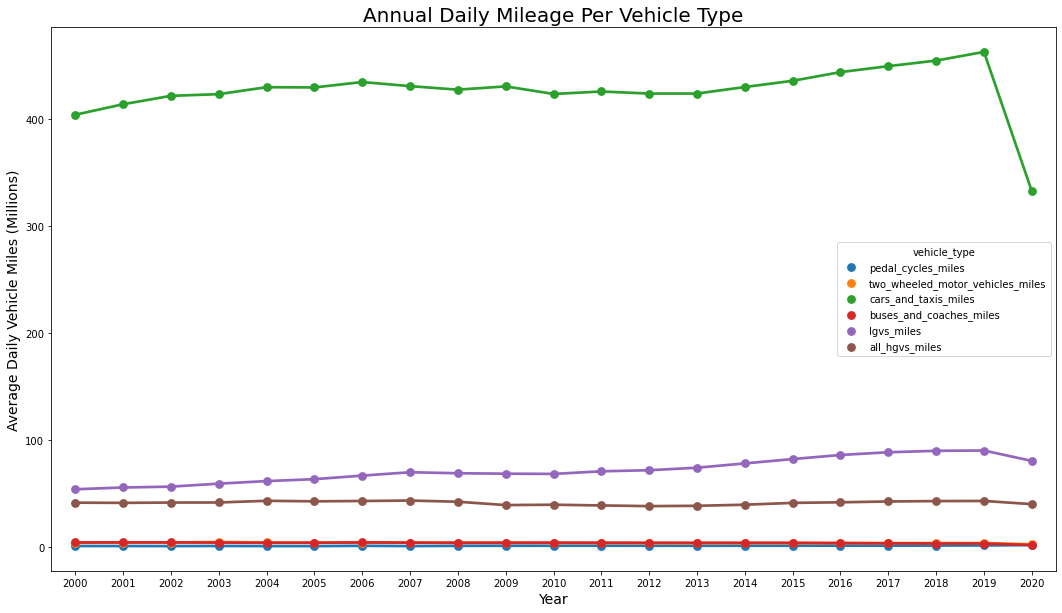

In [16]:
#extracting df for average daily mileage per vehicle type

df_plot_veh= df_mileage.groupby(['year']).sum()
df_plot_veh[df_plot_veh.columns.tolist()] = df_plot_veh[df_plot_veh.columns.tolist()] / 1000000 # converting to 
                                                                                                    #millions
df_plot_veh = df_plot_veh.loc[:,df_plot_veh.columns!="all_motor_vehicles_miles"] # all except total vehicle miles
df_plot_veh.reset_index(inplace=True)

df_melted = df_plot_veh.rename(columns = {'index':'year'}).melt("year",var_name="vehicle_type")

# plotting
plt.figure(figsize=(18,10))
ax = sns.pointplot(x='year', y='value', data=df_melted, hue="vehicle_type")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily Vehicle Miles (Millions)', fontsize=14)
plt.title('Annual Daily Mileage Per Vehicle Type', fontsize=20)
plt.show()

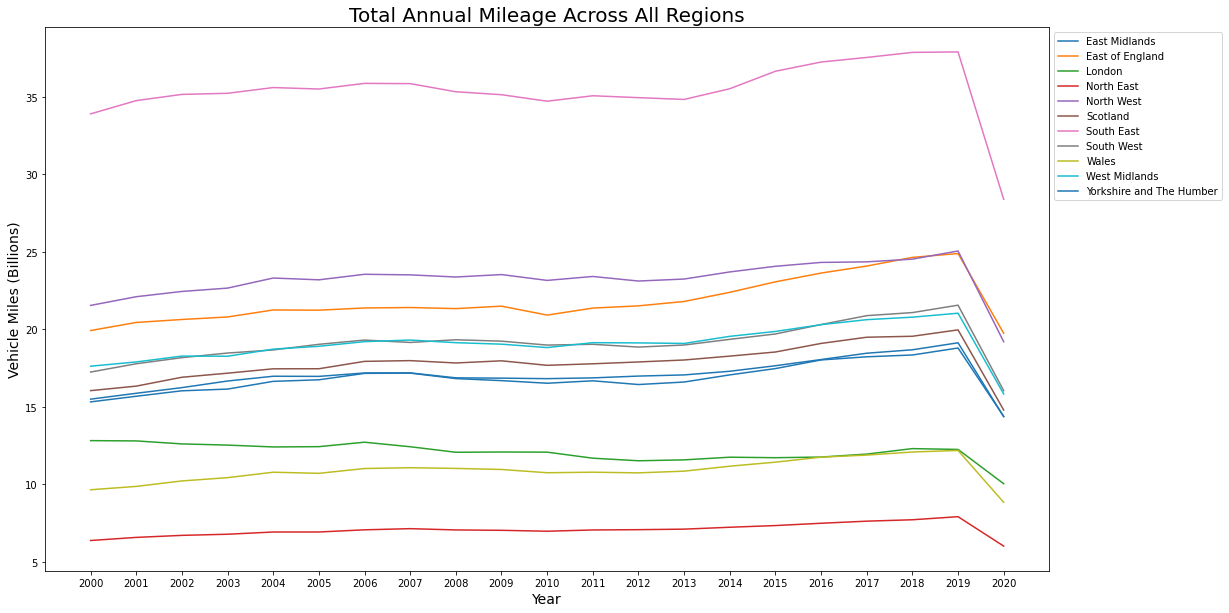

In [17]:
#extracting df for average annual mileage per region

df_plot_365 = df_mileage.copy()
df_plot_365[df_plot_365.columns.tolist()] = df_plot_365[df_plot_365.columns.tolist()] / 1000000000 
                                                                                        # ^ changing to billions
    
df_plot_365['total_motor_miles'] = df_plot_365.all_motor_vehicles_miles * 365 # multiplying 365 to change to 
                                                                                    # annual values
df_plot_365 = df_plot_365.unstack(level=1)
df_plot_365.plot(y='total_motor_miles', figsize=(18,10))

#plotting
plt.gca().set_title('Total Annual Mileage Across All Regions',fontsize=20)
plt.gca().set_xticks(df_plot_365.index)
plt.gca().set_xlabel("Year", fontsize=14)
plt.gca().set_ylabel("Vehicle Miles (Billions)", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

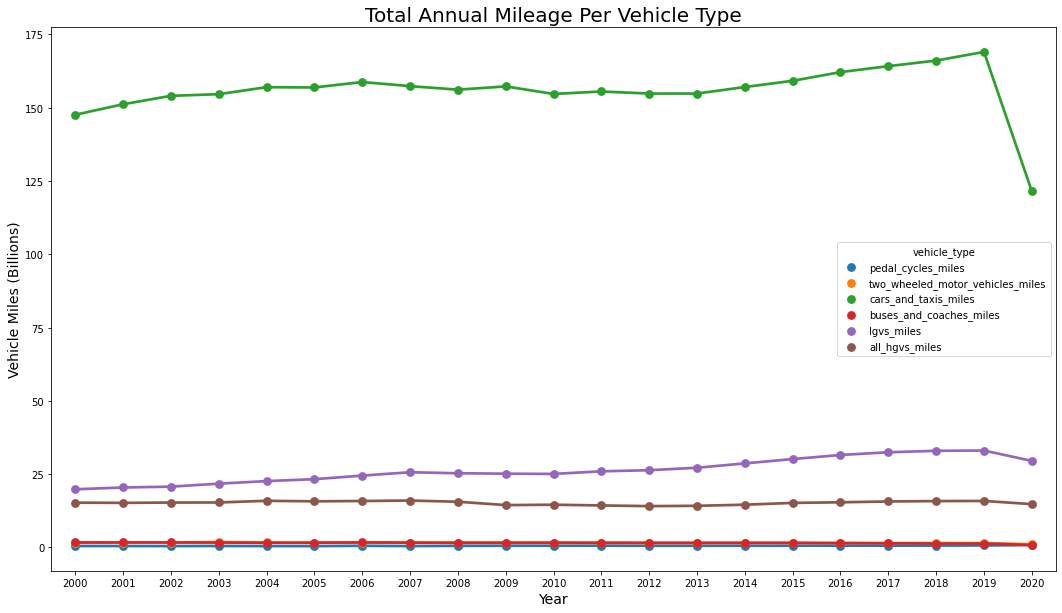

In [18]:
#extracting df for average annual mileage per vehicle type

df_plot_veh_365= df_mileage.groupby(['year']).sum()
df_plot_veh_365[df_plot_veh_365.columns.tolist()] = (df_plot_veh_365[df_plot_veh_365.columns.tolist()]*365) / 1000000000
# ^ multiplying 365 to change to annual values and changing to billions

df_plot_veh_365 = df_plot_veh_365.loc[:,df_plot_veh_365.columns!="all_motor_vehicles_miles"]  # all except total vehicle miles
df_plot_veh_365.reset_index(inplace=True)

df_melted = df_plot_veh_365.rename(columns = {'index':'year'}).melt("year",var_name="vehicle_type")

plt.figure(figsize=(18,10))
ax = sns.pointplot(x='year', y='value', data=df_melted, hue="vehicle_type")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Vehicle Miles (Billions)', fontsize=14)
plt.title('Total Annual Mileage Per Vehicle Type', fontsize=20)
plt.show()

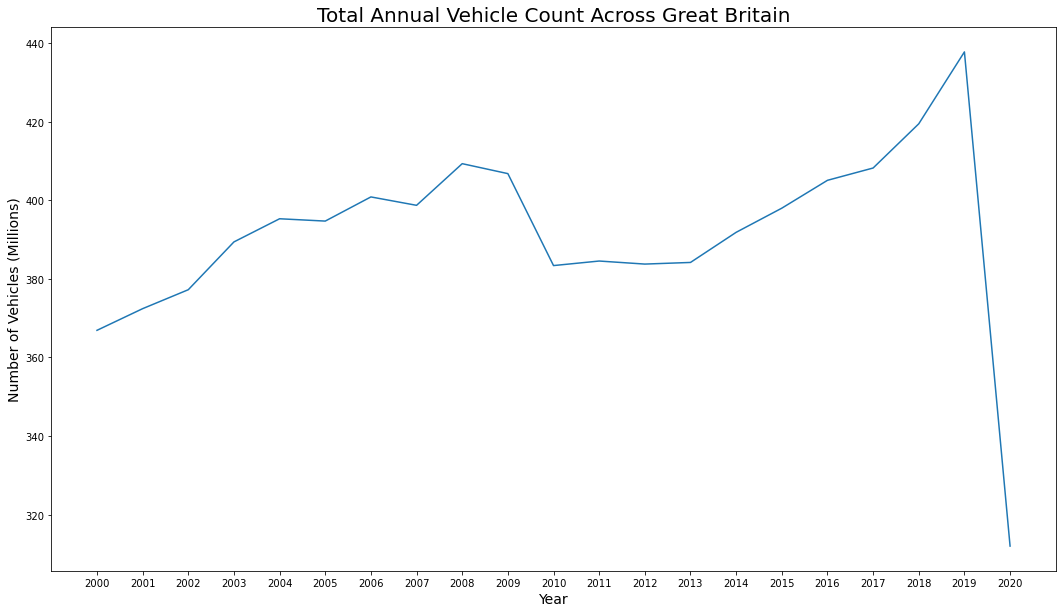

In [19]:
#extracting df for overall vehicle counts

df_plot_total = df_cleaning.copy()
df_plot_total = df_plot_total.groupby(['year'])['all_motor_vehicles'].sum() / 1000000 # changing to millions
df_plot_total.plot(y='all_motor_vehicles', figsize=(18,10))

#plotting

plt.gca().set_title('Total Annual Vehicle Count Across Great Britain', fontsize=20)
plt.gca().set_xticks(df_plot_total.index)
plt.gca().set_xlabel("Year", fontsize=14)
plt.gca().set_ylabel("Number of Vehicles (Millions)", fontsize=14)
plt.show()

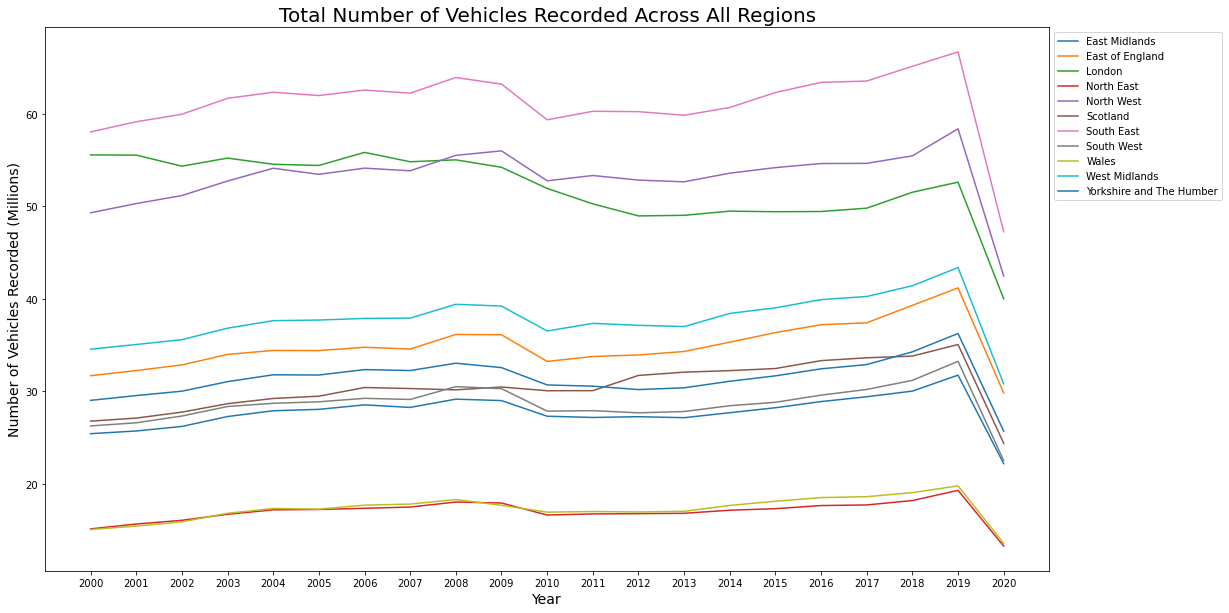

In [20]:
#extracting df for vehicle counts across regions

df_plot_count = df_cleaning.groupby(['year', 'region_name']).apply(lambda x: x) 
df_plot_count = df_plot_count.groupby(['year', 'region_name']).sum() / 1000000 # changing to millions
df_plot_count = df_plot_count[[*type_list]].unstack(level=1)
df_plot_count.plot(y='all_motor_vehicles', figsize=(18,10))

#plotting

plt.gca().set_title('Total Number of Vehicles Recorded Across All Regions', fontsize=20)
plt.gca().set_xticks(df_plot_count.index)
plt.gca().set_xlabel("Year", fontsize=14)
plt.gca().set_ylabel("Number of Vehicles Recorded (Millions)", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

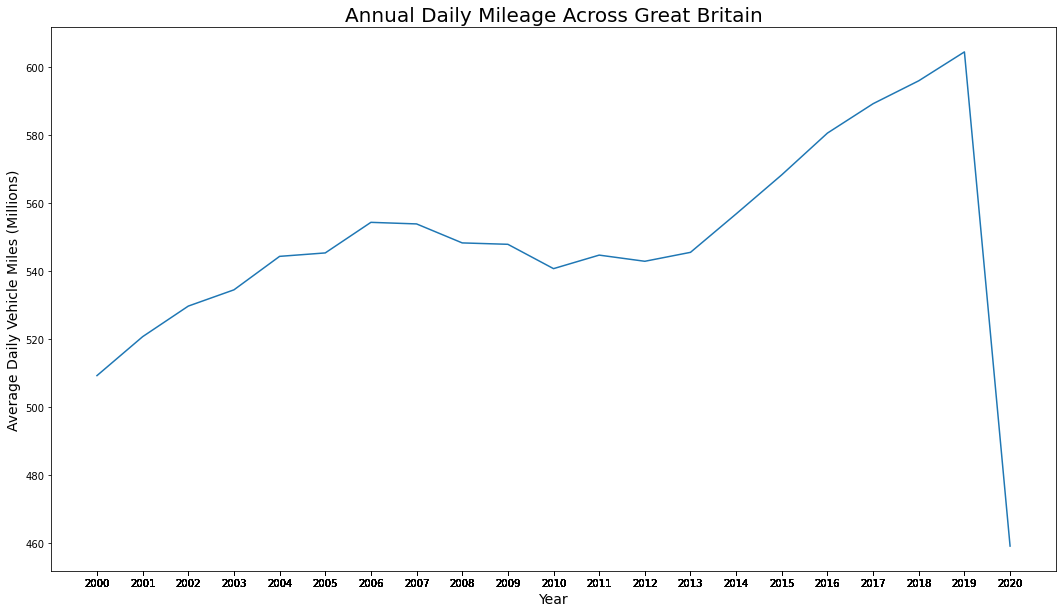

In [21]:
#extracting df for overall daily mileage

df_plot_miles = df_mileage.copy()
df_plot_miles = df_plot_miles.reset_index() 
total_vehicles = df_plot_miles.groupby(['year'])['all_motor_vehicles_miles'].sum() / 1000000 # changing to millions
total_vehicles = total_vehicles.reset_index()

#plotting

ax = total_vehicles.plot(x='year', y='all_motor_vehicles_miles', figsize=(18,10), legend = False)
ax.set_title('Annual Daily Mileage Across Great Britain', fontsize=20)
ax.set_xticks(df_plot_miles.year)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Average Daily Vehicle Miles (Millions)", fontsize=14)
total_vehicles = total_vehicles.reset_index()

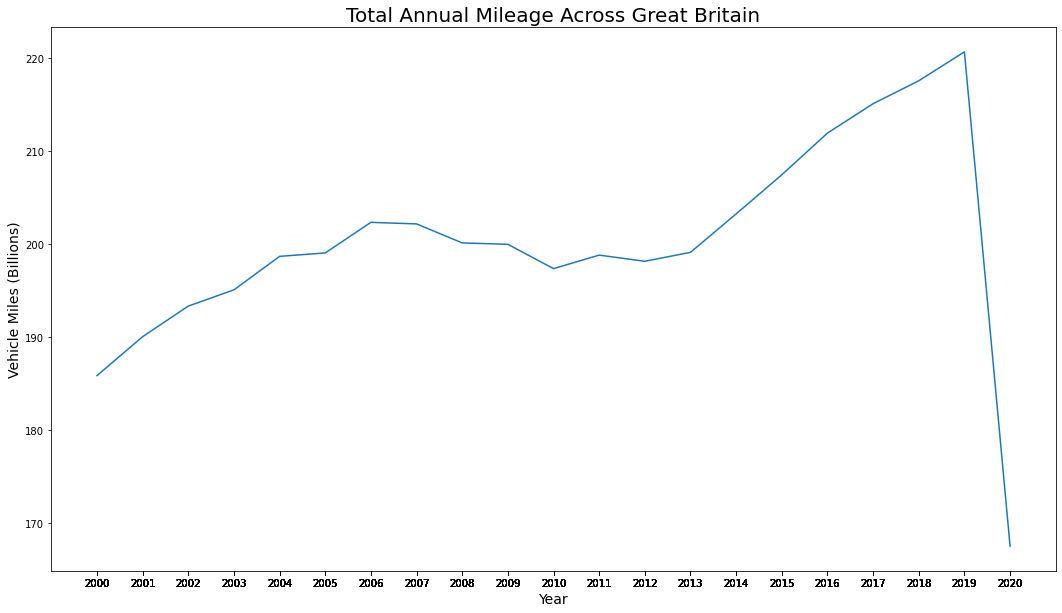

In [22]:
#extracting df for overall annual mileage

df_plot_act = df_mileage.copy()
df_plot_act = df_plot_act.reset_index()
total_vehicles_act = df_plot_act.groupby(['year'])['all_motor_vehicles_miles'].sum() / 1000000000 # changing to billions
total_vehicles_act = total_vehicles_act.reset_index()
total_vehicles_act['total_miles'] = total_vehicles_act.all_motor_vehicles_miles * 365 # multiplying to get annually

#plotting

ax = total_vehicles_act.plot(x='year', y='total_miles', figsize=(18,10), legend = False)
ax.set_title('Total Annual Mileage Across Great Britain', fontsize=20)
ax.set_xticks(df_plot_act.year)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Vehicle Miles (Billions)", fontsize=14)
total_vehicles_act = total_vehicles_act.reset_index()

## Task 2: Regression

Considering the trend in the final graph produced above, it is clear that the data corresponding to 2020 may be an outlier. In particular, I first tried to run the regression analysis with 2020 data included but the results were rather poor, hence I considered removing it instead. To test this hypothesis, we can carry out an outlier test as follows:

0     1.281538
1     0.906754
2     0.612301
3     0.455745
4     0.133454
5     0.100331
6     0.194122
7     0.178947
8     0.003913
9     0.017332
10    0.251650
11    0.121373
12    0.180807
13    0.094684
14    0.275383
15    0.652024
16    1.053590
17    1.336520
18    1.557264
19    1.835197
20    2.923166
Name: total_miles, dtype: float64


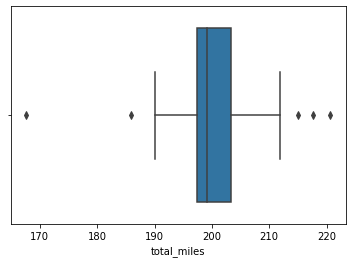

In [23]:
# outlier test.....remove 2020 for regression?

import seaborn as sns
sns.boxplot(x=total_vehicles_act['total_miles'])

from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(total_vehicles_act['total_miles']))
print(z)

From the above output, it is clear that the 2020 data produces a Z-score of 2.923166, this of which is considerably different from the Z-scores corresponding to the other years (further verified using the box-plot). As a rule of thumb, the emperical rules tells us that an outlier is known to be one with a Z-score of approximately 3 (approaches 3 standard deviations from the mean), and hence, with a Z-score of 2.923166 ≈ 3, we can infer that the 2020 data is indeed an outlier. We remove 2020 data and continue our analysis.

In [24]:
total_vehicles_act_x2020 = total_vehicles_act[:20]
total_vehicles_act_x2020   # 2020 removed

,index,year,all_motor_vehicles_miles,total_miles
0,0,2000,0.509242,185.873178
1,1,2001,0.520694,190.053302
2,2,2002,0.529692,193.337455
3,3,2003,0.534476,195.083592
4,4,2004,0.544324,198.678237
5,5,2005,0.545336,199.047669
6,6,2006,0.554334,202.331821
7,7,2007,0.553870,202.162573
8,8,2008,0.548282,200.123058
9,9,2009,0.547872,199.973389


,total_miles
year,
2000-01-01,185.873178
2001-01-01,190.053302
2002-01-01,193.337455
2003-01-01,195.083592
2004-01-01,198.678237
2005-01-01,199.047669
2006-01-01,202.331821
2007-01-01,202.162573
2008-01-01,200.123058


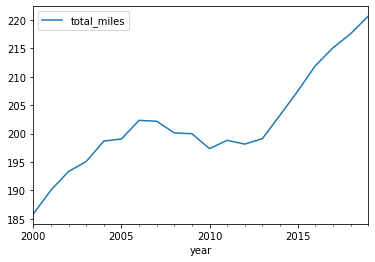

In [25]:
train_df = total_vehicles_act_x2020.copy()
train_df['year'] =  pd.to_datetime(train_df['year'],format='%Y')
train_df.index = train_df['year']
train_df = train_df.filter(['total_miles'], axis=1)
train_df.plot()
train_df

In order to implement regression via ARIMA (AutoRegressive Integrated Moving Average), we must first ensure that the time series data is stationary. We can crosscheck this using the Augmented Dickey-Fuller test as follows:

In [26]:
from statsmodels.tsa.stattools import adfuller
adfuller(train_df['total_miles'])
# p -value = 0.98 > 0.05 thus not stationary

(0.38014815739754726,
 0.9807371815787663,
 8,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 28.6865507969097)

From the above output, the p-value is approximately 0.98 and thus, is more than 0.05. Hence, we can fail to reject the null-hypothesis of the data being non-stationary, at the 5% significance level. Because of this result, we must now difference the data so as to transform it to a stationary state. We implement this below:

<AxesSubplot:xlabel='year'>

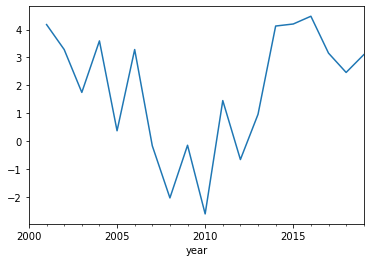

In [27]:
train_df['1difference']=train_df['total_miles']-train_df['total_miles'].shift(1)

train_df['1difference'].plot()

In [28]:
adfuller(train_df['1difference'].dropna()) # running test again
# p-value < 0.05...d = 1

(-5.991118374573011,
 1.7447054366728047e-07,
 6,
 12,
 {'1%': -4.137829282407408,
  '5%': -3.1549724074074077,
  '10%': -2.7144769444444443},
 27.89079364012058)

From the above output, we can see that differencing the data results in a p-value that is approximately equal to zero and hence, is less than 0.05. Hence, the data is now stationary as we can now reject the null-hypothesis of the data being non-stationary, at the 5% significance level. We retain this information for use in the model; specifically d = 1.

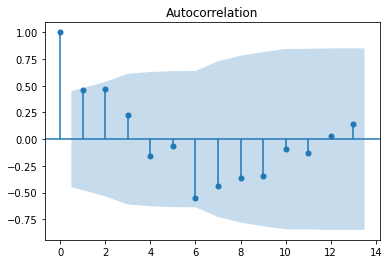

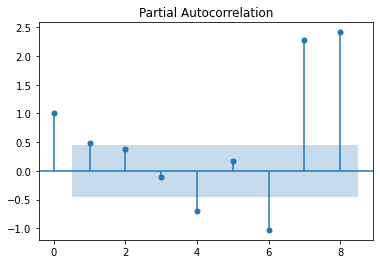

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1=plot_acf(train_df['1difference'].dropna()) 
fig2=plot_pacf(train_df['1difference'].dropna(), lags = 8) 



From the ACF (first) plot above, we can see that all of the lags are within the significance region and so we fix q = 0. From the PACF (second) plot, we can see that two of the lags appear to be signifcant and so we fix p = 2. We implement these parameters in the ARIMA model as follows: 

In [30]:
model = ARIMA(train_df['total_miles'], order=(2,1,0), freq=train_df.index.inferred_freq)
results_ARIMA = model.fit(disp=-1)
print(results_ARIMA.summary())



                             ARIMA Model Results                              
Dep. Variable:          D.total_miles   No. Observations:                   19
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -37.815
Method:                       css-mle   S.D. of innovations              1.747
Date:                Fri, 29 Apr 2022   AIC                             83.631
Time:                        17:00:14   BIC                             87.409
Sample:                    01-01-2001   HQIC                            84.270
                         - 01-01-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1898      1.048      2.090      0.037       0.136       4.243
ar.L1.D.total_miles     0.3129      0.208      1.506      0.132      -0.094       0.720
ar.L2.D.total_mi

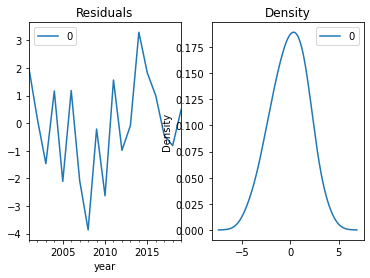

In [31]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



NormaltestResult(statistic=0.22791880208121318, pvalue=0.892294181362281)


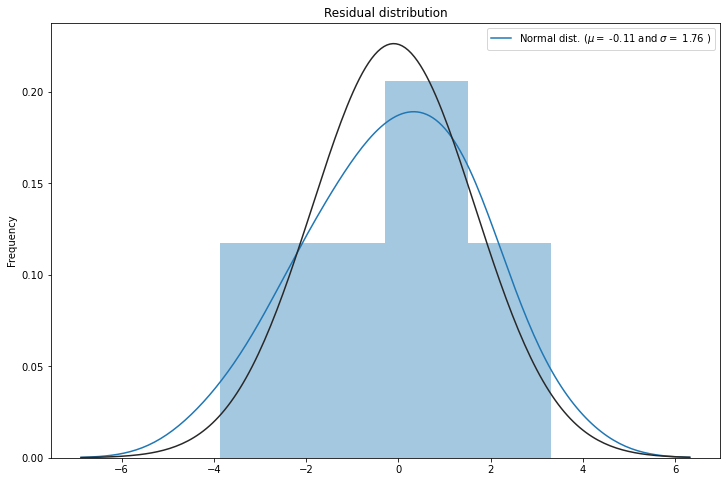

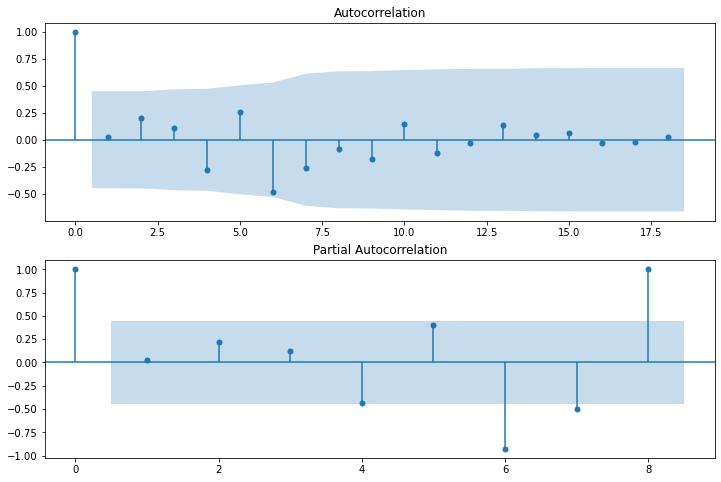

In [32]:
from scipy import stats
from scipy.stats import normaltest


# reference: https://www.kaggle.com/code/sumi25/understand-arima-and-tune-p-d-q/notebook

resid = results_ARIMA.resid
print(normaltest(resid))   #large p-value.....follows normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats
(mu, sigma) = stats.norm.fit(resid)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results_ARIMA.resid, lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results_ARIMA.resid, lags=8, ax=ax2)

In [33]:
sm.stats.acorr_ljungbox(results_ARIMA.resid, lags=[18], return_df=True) # >0.05...good fit

,lb_stat,lb_pvalue
18,19.983527,0.333748


Just running some model diagnostics; first we plot the residual distribution and compare this against the normal distribution. It appears that the residual distribution follows a normal distribution but to verify this with certainty, we run the `normaltest` function and see a p-value of approximately 0.89, hence implying that the residual distribution does indeed follow a normal distribution. Lastly, using the Ljung-Box test in the most recent cell, we test the null hypothesis of the model not exhibiting lack of fit (ie. the model is a good fit). With a p-value of 0.333748 which is greater than 0.05, we can infer the the chosen model is in fact a good fit. We now plot the corresponding regression model as seen below:

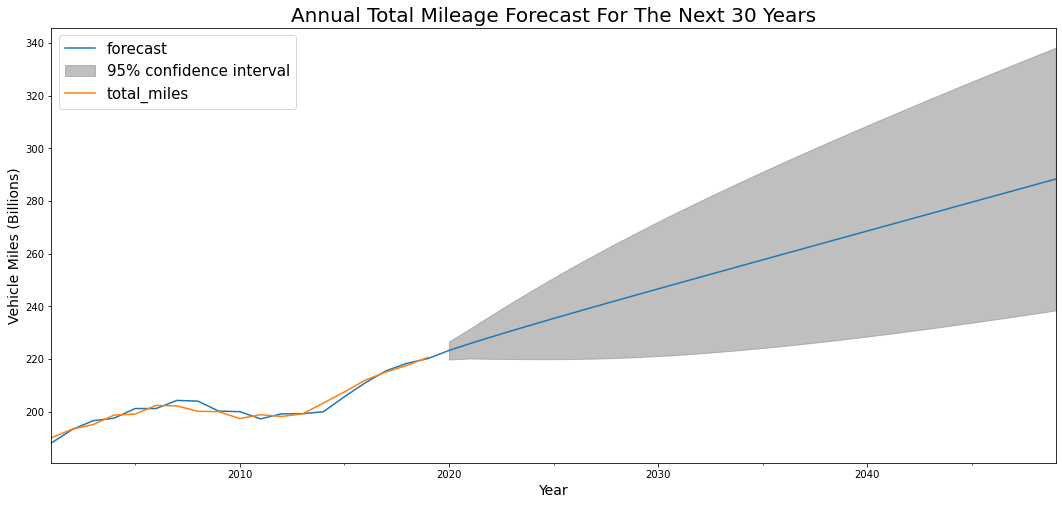

In [34]:
fig = results_ARIMA.plot_predict(1,49)
fig.set_figheight(8)
fig.set_figwidth(18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Vehicle Miles (Billions)', fontsize=14)
plt.title('Annual Total Mileage Forecast For The Next 30 Years', fontsize=20)
plt.legend(loc='upper left', prop={'size':15})
plt.show()

In [35]:
mileage_regression_mean_results = results_ARIMA.forecast(steps=31)[0]
mileage_regression_mean_results

array([223.20295219, 225.82174214, 228.27476352, 230.69341521,
       233.04470157, 235.36317113, 237.64836638, 239.91194262,
       242.15739072, 244.38978331, 246.61189985, 248.82634239,
       251.03487432, 253.23893605, 255.4395805 , 257.63762905,
       259.8336983 , 262.0282617 , 264.22167795, 266.41422099,
       268.60609905, 270.79747081, 272.98845706, 275.17914977,
       277.36961897, 279.55991799, 281.75008743, 283.94015821,
       286.13015386, 288.32009231, 290.50998721])

## Task 3: EV Mileage and Power Generation Estimates

For this task, I first considered data regarding estimates of future road traffic composition. In particular, I used a graph published by the UK Department for Transport, depicting the relative vehicle fleet composition by 2050, avaiable from: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/873929/road-traffic-forecasts-2018-document.pdf (page 42, figure 19). As noted by the UK Department for Transport, under the Shift to Zero Emission Vehicles initiative, approximately 97% of miles are expected to be travelled by electric vehicles by 2050. With this in mind and the graph, I created the `EV forecast` variable as follows:

In [36]:

EV_forecast = [99.7, 99.6, 99.4, 99, 98.8, 98.4, 97.8, 96.4, 95.5, 93,
               91.2, 88.1, 85.3, 82.6, 78.5, 72.9, 67.9, 62.1, 55.6, 50.3, 
               44.8, 38.8, 33.3, 29, 24.6, 20.7, 16.8, 13.5, 11.5, 9.1, 7.2,
               6.2, 4.9, 4.1, 3.6, 3.1]
years = np.arange(2015,2051)


EV_df = pd.DataFrame(EV_forecast, years, columns=['EV_composition'])

EV_df['EV_percent'] = np.abs(EV_df.EV_composition - 100)
EV_df

,EV_composition,EV_percent
2015,99.7,0.3
2016,99.6,0.4
2017,99.4,0.6
2018,99.0,1.0
2019,98.8,1.2
2020,98.4,1.6
2021,97.8,2.2
2022,96.4,3.6
2023,95.5,4.5
2024,93.0,7.0


Now, using the actual values corresponding to the annual total miles from our basic analysis, as well as the predicted miles for the next 30 years, we derive the estimated EV mileage by multiplying the total mileage by the predicted EV composition (%) as follows:

In [37]:
total_mileage = np.concatenate((train_df.total_miles[15:], mileage_regression_mean_results))
EV_mileage = total_mileage * EV_df.EV_percent / 100
EV_mileage_driven = pd.DataFrame(data = {'year': years, 'total_mileage': total_mileage,
                                          'electric_mileage': EV_mileage})
EV_mileage_driven

,year,total_mileage,electric_mileage
2015,2015,207.438987,0.622317
2016,2016,211.917821,0.847671
2017,2017,215.073454,1.290441
2018,2018,217.535503,2.175355
2019,2019,220.635410,2.647625
2020,2020,223.202952,3.571247
2021,2021,225.821742,4.968078
2022,2022,228.274764,8.217891
2023,2023,230.693415,10.381204
2024,2024,233.044702,16.313129


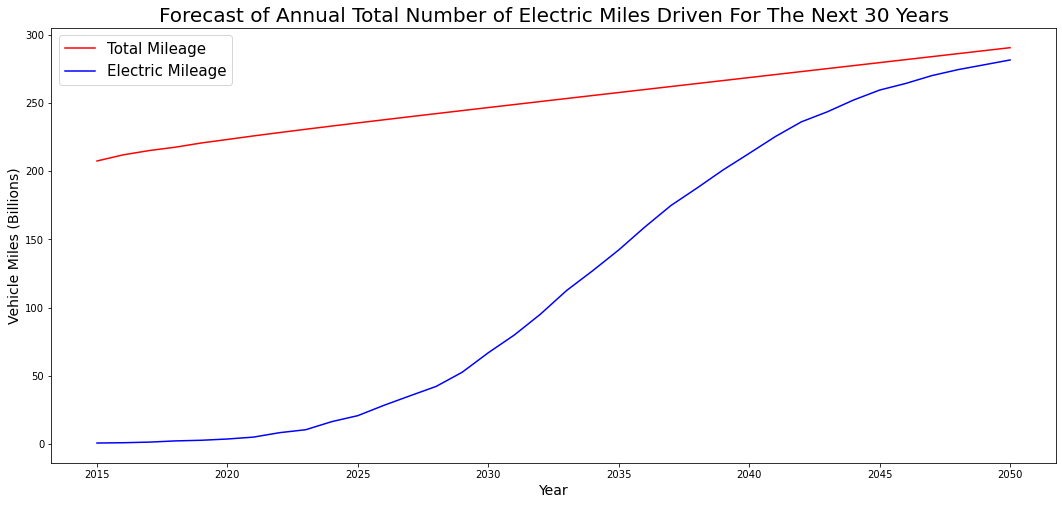

In [38]:
plt.figure(figsize=(18,8))

plt.plot(EV_mileage_driven.year, EV_mileage_driven.total_mileage, color='r',
         label='Total Mileage')
plt.plot(EV_mileage_driven.year, EV_mileage_driven.electric_mileage, color='b',
         label='Electric Mileage')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Vehicle Miles (Billions)', fontsize=14)
plt.title('Forecast of Annual Total Number of Electric Miles Driven For The Next 30 Years', fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.show()

From https://ev-database.uk/cheatsheet/energy-consumption-electric-car, we can see that the average energy consumption of electric vehicles turns out to be 314 Wh/mi. We can now multiply this value with the forecasted electric mileage in order to get the estimated power consumption in TWh, this of which would be necessary to compensate for the increase in electric vehicles as follows:

In [39]:
electric_power_consumption_TWh = EV_mileage_driven.electric_mileage * 314/1e3
electric_power_consumption_TWh

2015     0.195408
2016     0.266169
2017     0.405198
2018     0.683061
2019     0.831354
2020     1.121372
2021     1.559977
2022     2.580418
2023     3.259698
2024     5.122323
2025     6.503555
2026     8.879969
2027    11.073855
2028    13.230511
2029    16.498754
2030    20.985193
2031    25.080202
2032    29.874656
2033    35.305560
2034    39.863390
2035    44.655815
2036    49.931722
2037    54.878675
2038    58.905581
2039    63.075165
2040    66.883456
2041    70.745298
2042    74.146395
2043    76.469534
2044    79.168501
2045    81.461524
2046    82.984417
2047    84.788506
2048    86.161229
2049    87.273339
2050    88.392312
Name: electric_mileage, dtype: float64

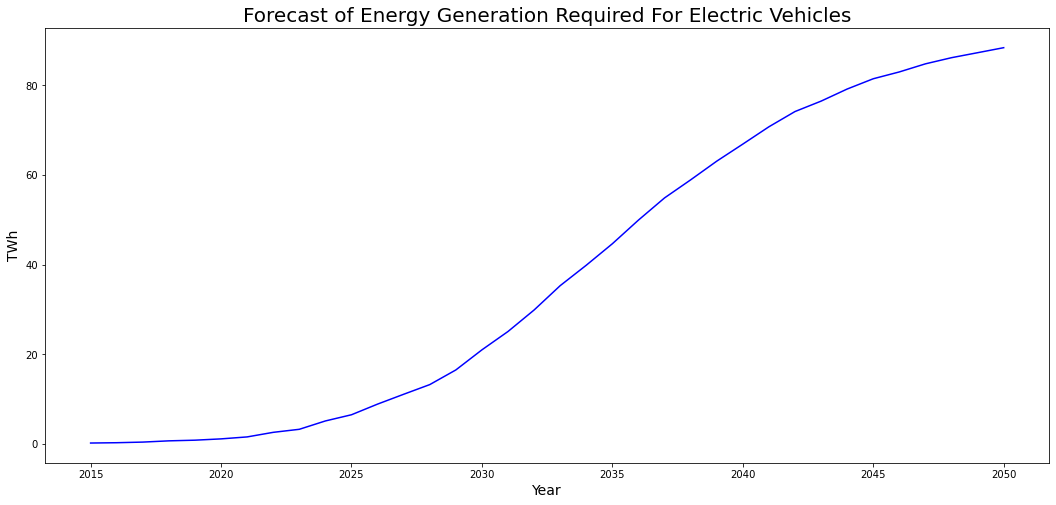

In [40]:
plt.figure(figsize=(18,8))
plt.plot(years, electric_power_consumption_TWh, color='b')

plt.xlabel('Year', fontsize=14)
plt.ylabel('TWh', fontsize=14)
plt.title('Forecast of Energy Generation Required For Electric Vehicles', fontsize=20)

plt.show()

To accurately determine the additional amount of energy required to meet the demand for electric vehicles, we consider past reports on UK's electricity demand and supply/generation. From a published 2020 report, available from: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1006701/DUKES_2021_Chapter_5_Electricity.pdf, we note the trend of decreasing demand and thus, supply for electricity. Demand for electricity is mainly met by UK generation and supplemented with imports from Europe. Electricity generation fell to record low levels in 2020, with total electricity generation in 2020 of 312.0 TWh, 3.6 per cent less than in 2019. This reflects lower demand for electricity during 2020 as a result of the UK's Covid-19 restrictions. Assuming this decreasing trend will continue for subsequent years, we use this value of 3.6 percent to estimate the additional energy required as follows:

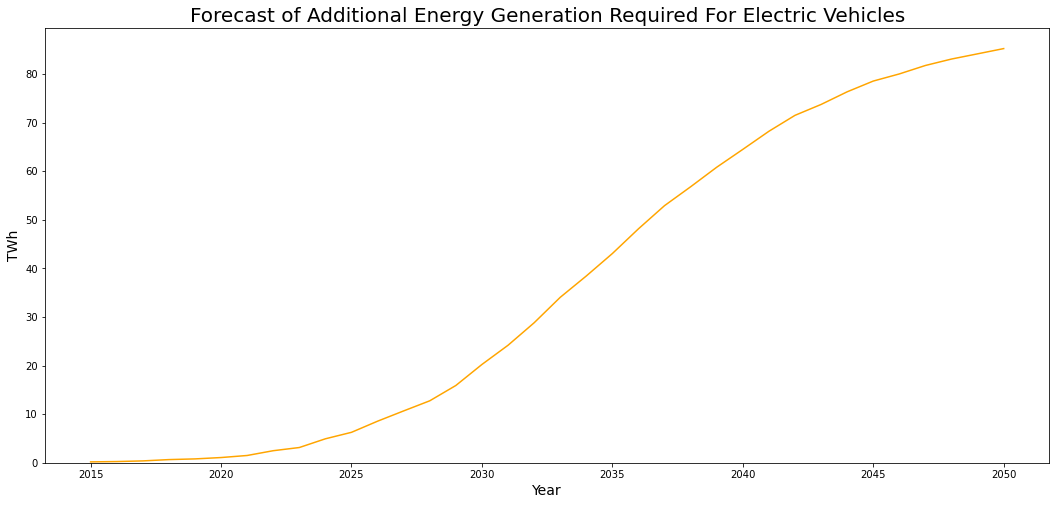

In [41]:
plt.figure(figsize=(18,8))

# from report, energy generation/supply was down 3.6 %
# assuming this trend will continue, we can get the energy needed
plt.plot(years, electric_power_consumption_TWh - (electric_power_consumption_TWh*0.036), color='orange')

plt.xlabel('Year', fontsize=14)
plt.ylabel('TWh', fontsize=14)
plt.title('Forecast of Additional Energy Generation Required For Electric Vehicles', fontsize=20)
plt.ylim(0)

plt.show()

In [42]:
pd.DataFrame(years,electric_power_consumption_TWh - (electric_power_consumption_TWh*0.036))

,0
electric_mileage,
0.188373,2015
0.256587,2016
0.390611,2017
0.658471,2018
0.801425,2019
1.081002,2020
1.503817,2021
2.487523,2022
3.142349,2023


In [43]:
#312 generated in 2020...17.9 imported so 329.9 supplied in all
#330 demanded
#330 - 312 = 18
323.23199999999997-(323.23199999999997*0.036)

311.595648

In [44]:
(375-(3.15*20))
# approx 375 generated in 2000
# 312 generated in 2020
# approx 3.15 decrease every year in past 20 years ...(375-(3.15*20)) = 312
# so assuming this trend continues...additional generation capacity would be:


312.0

## Task 4: Recommendations


In [45]:
rec_df = df_mileage.copy()
rec_df.reset_index(inplace=True)
rec_df['all_motor_vehicles_miles'] = (rec_df.all_motor_vehicles_miles*365) / 1000000000
rec_df = rec_df.filter(['year', 'region_name','all_motor_vehicles_miles'], axis=1)
rec_df

,year,region_name,all_motor_vehicles_miles
0,2000,East Midlands,15.489089
1,2000,East of England,19.918988
2,2000,London,12.811257
3,2000,North East,6.363676
4,2000,North West,21.540255
...,...,...,...
226,2020,South East,28.390479
227,2020,South West,16.034392
228,2020,Wales,8.829100
229,2020,West Midlands,15.823015


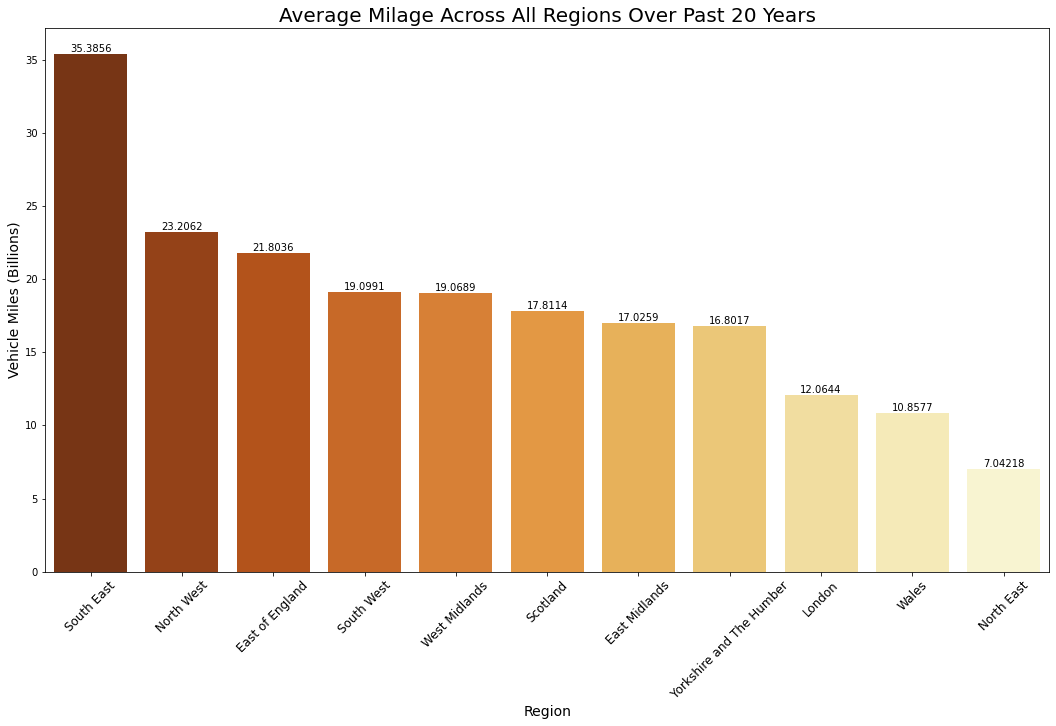

In [46]:
plt.figure(figsize=(18,10))

plot_order = rec_df.groupby('region_name')['all_motor_vehicles_miles'].sum().sort_values(ascending=False).index.values

ax = sns.barplot(x='region_name', y='all_motor_vehicles_miles', data=rec_df, ci=None, order = plot_order,
                palette = 'YlOrBr_r')


ax.bar_label(ax.containers[0])

plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Vehicle Miles (Billions)', fontsize=14)
plt.title('Average Milage Across All Regions Over Past 20 Years', fontsize=20)
plt.show()

After visualising the regional proportion of average vehicle miles over past 20 years, we can retain these values in order to estimate the additional regional generation required for year 2040. We choose 2040 specificially because reports regarding technology cost estimates from the Department for business, energy and strategy (BEIS), forecast values until 2040 (https://www.gov.uk/government/publications/beis-electricity-generation-costs-2020). Multiplying these proportions by the estimated amount of additional energy generation required for 2040 will therefore give us the additional energy required per region.

In [47]:
mileage_ave_regions = rec_df.groupby(['region_name']).mean()
mileage_ave_regions['mileage_proportion'] = (mileage_ave_regions.all_motor_vehicles_miles / 
                                        mileage_ave_regions.all_motor_vehicles_miles.sum())

# additional energy generation required for 2040 is 64.475651 TWh...
# see dataframe under 'Forecast of Additional Energy Generation Required For Electric Vehicles' graph

mileage_ave_regions['additional_power_2040'] = mileage_ave_regions.mileage_proportion * 64.475651 * 1e6
mileage_ave_regions = mileage_ave_regions.drop(['year'], axis=1)
mileage_ave_regions

,all_motor_vehicles_miles,mileage_proportion,additional_power_2040
region_name,,,
East Midlands,17.025865,0.085058,5.484197e+06
East of England,21.803604,0.108927,7.023154e+06
London,12.064417,0.060272,3.886067e+06
North East,7.042180,0.035182,2.268355e+06
North West,23.206226,0.115934,7.474952e+06
Scotland,17.811430,0.088983,5.737236e+06
South East,35.385592,0.176781,1.139805e+07
South West,19.099135,0.095416,6.152018e+06
Wales,10.857679,0.054243,3.497364e+06


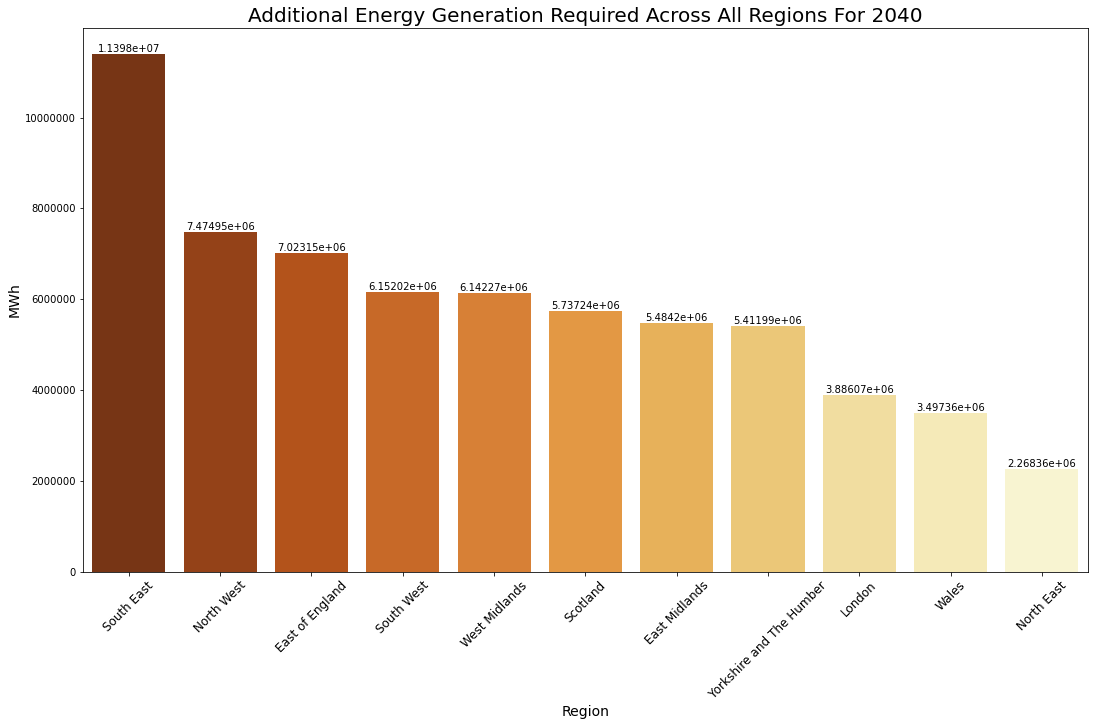

In [48]:
plt.figure(figsize=(18,10))

plot_order = mileage_ave_regions.groupby('region_name')['additional_power_2040'].sum().sort_values(ascending=False).index.values

ax = sns.barplot(x=mileage_ave_regions.index, y='additional_power_2040', data=mileage_ave_regions, ci=None, 
                order = plot_order, palette = 'YlOrBr_r')

ax.bar_label(ax.containers[0])

plt.xlabel('Region', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('MWh', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Additional Energy Generation Required Across All Regions For 2040', fontsize=20)
plt.show()

In [49]:
# data below derived using Table 4.17 (page 33) from the same resource provided above
# https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf

rec_data = {
    'years' : [2025,2025,2025,2025,2025,2030,2030,2030,2030,2030,
         2035,2035,2035,2035,2035,2040,2040,2040,2040,2040],
    'tech' : ['CCGT H Class', 'Offshore Wind', 'Onshore Wind',
               'Large-Scale Solar', 'CCGT + CCS Post Combustion']*4,
    'costs' : [85, 57, 46, 44, 85, 99, 47, 45, 39, 87, 115, 43, 44, 36, 81,
        125, 40, 44, 33, 82]
}

rec = pd.DataFrame(rec_data, columns = ['years', 'tech', 'costs'])
rec

,years,tech,costs
0,2025,CCGT H Class,85
1,2025,Offshore Wind,57
2,2025,Onshore Wind,46
3,2025,Large-Scale Solar,44
4,2025,CCGT + CCS Post Combustion,85
5,2030,CCGT H Class,99
6,2030,Offshore Wind,47
7,2030,Onshore Wind,45
8,2030,Large-Scale Solar,39
9,2030,CCGT + CCS Post Combustion,87


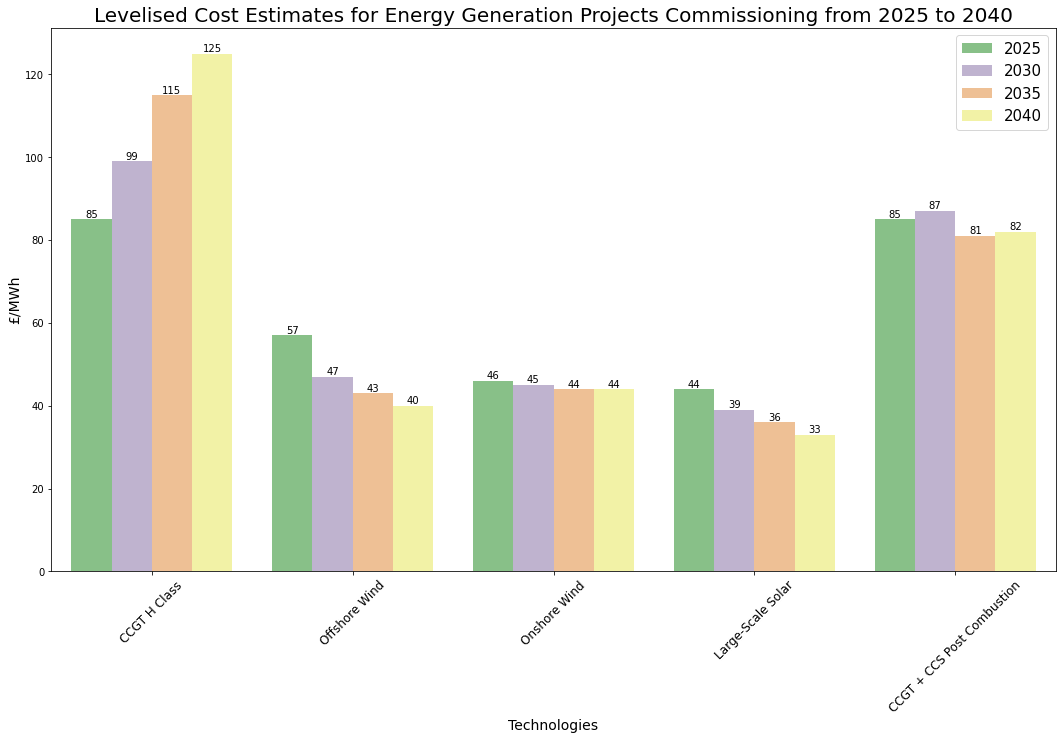

In [50]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x='tech', y='costs', data=rec, hue='years', palette='Accent')
plt.xlabel('Technologies', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

for container in ax.containers:
        ax.bar_label(container)

plt.ylabel('£/MWh', fontsize=14)
plt.title('Levelised Cost Estimates for Energy Generation Projects Commissioning from 2025 to 2040', fontsize=20)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

From the above output, we can see that large-scale solar technology is estimated to have the lowest levelised cost of £33/MWh followed by offshore wind at £40/MWh and onshore wind at £44/MWh. CCGT H class and CCGT + CCS post combustion are significantly more expensive at £125/MWh and £82/MWh, respectively.

Intuitively, one might be hasty to conclude that more emphasis should be placed on solar energy but considering the meteorological conditions that frequent the UK, this notion should be considered more carefully. In other words, it might not be practical to invest in solar power technology considering the tendency for there to be rainy/windy weather in the UK. Likewise, with knowledge that EV charging peaks at nighttime (https://www.nationalgrideso.com/document/170756/download (page 91, figure 4.28)), solar energy will be unable to supply energy to meet the demands at this time.  Following from this idea, it might be more practical to invest in offshore/onshore wind technology. CCGT technology on a whole is seen to be more expensive and hence, should be used when wind and solar energy are limited (ie. when the weather (cloudy/not windy) conditions do not allow them to function). With all of this in mind, I purpose the following recommendations to compensate for the additional energy required for the shift to electric vehicles:

* 30% offshore wind
* 25% onshore wind
* 15% solar energy
* 15% CCGT + CCS post combustion
* 15% CCGT H Class

In [51]:
rec_costs = mileage_ave_regions[['additional_power_2040']].copy()

rec_costs['solar_costs'] = rec_costs.additional_power_2040 * 33 * 0.15 / 1e6
rec_costs['onshore_wind_costs'] = rec_costs.additional_power_2040 * 44 * 0.25 / 1e6
rec_costs['offshore_wind_costs'] = rec_costs.additional_power_2040 * 40 * 0.30 / 1e6
rec_costs['CCGT_CCS_costs'] = rec_costs.additional_power_2040 * 82 * 0.15 / 1e6
rec_costs['CCGT_H_costs'] = rec_costs.additional_power_2040 * 125 * 0.15 / 1e6

rec_costs = rec_costs.drop(['additional_power_2040'], axis=1)
rec_costs.reset_index(inplace=True)

rec_costs = rec_costs.rename(columns = {'index':'region_name'}).melt("region_name", var_name="costs")

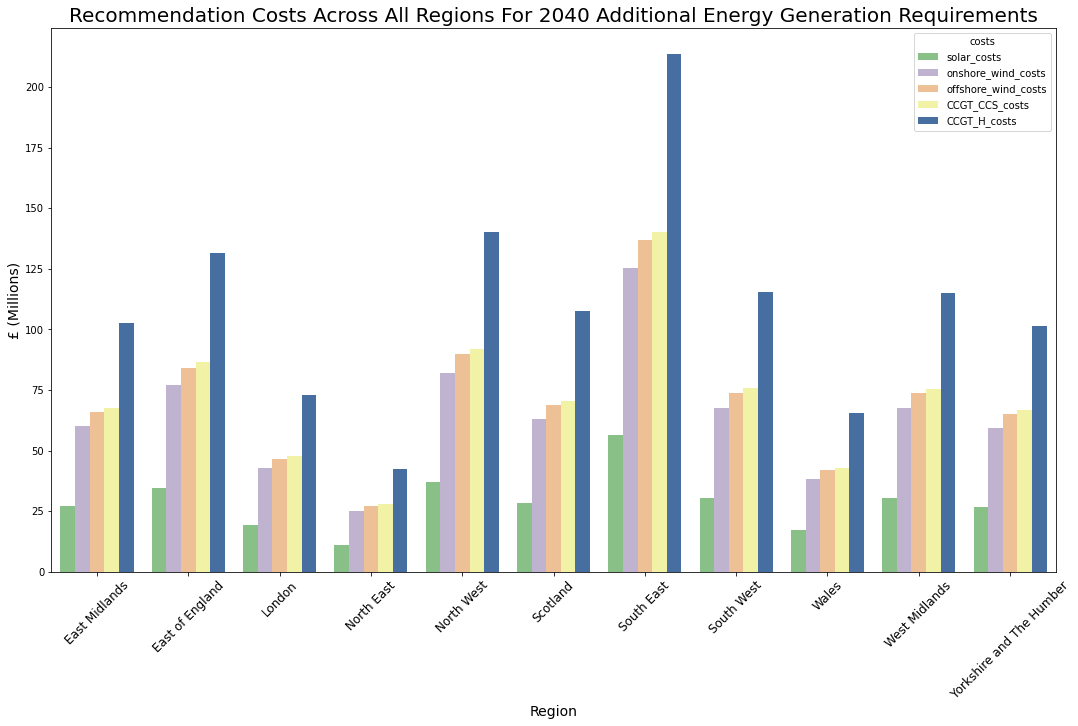

In [52]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x='region_name', y='value', data=rec_costs, hue="costs", palette='Accent')
plt.ticklabel_format(style='plain', axis='y')



plt.xlabel('Region', fontsize=14)
plt.ylabel('£ (Millions)', fontsize=14)
plt.title('Recommendation Costs Across All Regions For 2040 Additional Energy Generation Requirements', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.show()

Lastly, it should be noted that this is just a general recommendation; specifically, division of technologies may vary from region to region due to locational differences. For example, regions with more inland areas may invest more in onshore wind and solar technology when compared to offshore wind technology. Likewise, it makese sense for regions with more coastal areas to invest in more offshore wind technology. 

In [53]:
rec_costs_ave = rec_costs.groupby(['region_name']).sum().apply(lambda x: x) 
rec_costs_ave


,value
region_name,
East Midlands,323.567651
East of England,414.366091
London,229.277929
North East,133.832950
North West,441.022177
Scotland,338.496904
South East,672.484669
South West,362.969068
Wales,206.344505
